In [1]:
import pandas as pd
import numpy as np
import random
import csv
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import KFold
import time
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#csv_result-1year   australian.dat  Polish1yeartrain
url = "Polish1yeartrain.csv"
#url = "C:/Users/GEM TEST II/Documents/pyt/PSO-SVM-Algorithm-master/PSO-SVM-Algorithm-master/PSO SVM ALGORITHM/Polish1yeartrain.csv"
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15', 'x16', 'x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29', 'x30', 'x31','x32','x33','x34','x35','x36','x37','x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x48','x49', 'x50','x51','x52','x53','x54','x55','x56','x57','x58','x59','x60','x61','x62','x63','x64','y']
#url = "Polish1yeartrain.csv"
colnames = ['x1', 'x2', 'x3','y']
data = pd.read_csv(url,header = None, names = colnames)
#X = data.drop('y', axis = 1)
#X =(X-X.mean())/X.std()
#y = data['y']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
#random_state=42

In [3]:
data.shape

(7027, 4)

In [4]:
data['y'].value_counts()

0    6756
1     271
Name: y, dtype: int64

In [5]:
data['y'].value_counts()/np.float(len(data))

0    0.961434
1    0.038566
Name: y, dtype: float64

In [6]:
# declare feature vector and target variable

X = data.drop(['y'], axis=1)
y = data['y']

In [7]:
# import resample module 

from sklearn.utils import resample

In [8]:
# separate the minority and majority classes
df_majority = data[data['y']==0]
df_minority = data[data['y']==1]

In [9]:
# oversample minority class

df_minority_oversampled = resample(df_minority, replace=True, n_samples=6756, random_state=0)

In [10]:
# combine majority class with oversampled minority class

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [11]:
# display new class value counts

df_oversampled['y'].value_counts()

0    6756
1    6756
Name: y, dtype: int64

<AxesSubplot:>

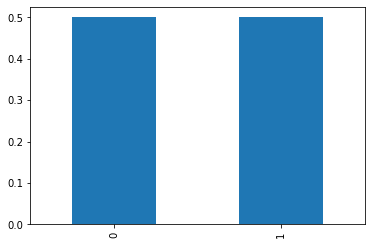

In [12]:
# view the distribution of percentages within the Class column


(df_oversampled['y'].value_counts()/np.float(len(df_oversampled))).plot.bar()

In [13]:
# declare feature vector and target variable
X1 = df_oversampled.drop(['y'], axis=1)
X1 =(X1-X1.mean())/X1.std()
y1 = df_oversampled['y']
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size = 0.20, random_state=42)

In [14]:
dt_classifier = DecisionTreeClassifier()#RandomForestClassifier()#DecisionTreeClassifier()#LogisticRegression()
dt_classifier.fit(X_train, y_train)
#svclassifier = SVC(kernel='rbf', gamma = best_gamma, C = best_C )  
#svclassifier.fit(X_train, y_train)
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)
confusion_matrix(y_train,y_train_pred), confusion_matrix(y_test, y_test_pred)

(array([[5394,    3],
        [   0, 5412]], dtype=int64),
 array([[1296,   63],
        [   0, 1344]], dtype=int64))

In [15]:
(confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

(0.0002775464890369137, 0.023307436182019976)

In [16]:
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report
#import time
#Performance Metrics
print("Training Findings")
print("Accuracy:",accuracy_score(y_train,y_train_pred))  
print("Confusion Matrix:",confusion_matrix(y_train,y_train_pred))
print("Testing Findings")
print("Accuracy:",accuracy_score(y_test, y_test_pred)) 
print("Confusion Matrix:",confusion_matrix(y_test, y_test_pred))
#Time
#start = time.time()
#model.fit(X, y)
#dt_classifier.fit(X_train, y_train)
#stop = time.time()
#print(f"Training time: {stop - start}s")

Training Findings
Accuracy: 0.9997224535109631
Confusion Matrix: [[5394    3]
 [   0 5412]]
Testing Findings
Accuracy: 0.97669256381798
Confusion Matrix: [[1296   63]
 [   0 1344]]


In [17]:
#Time
start = time.time()
#model.fit(X, y)
dt_classifier.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")


Training time: 0.04497027397155762s


In [18]:
#Time
start = time.time()
#model.fit(X, y)
dt_classifier.fit(X_test, y_test)
stop = time.time()
print(f"Test time: {stop - start}s")

Test time: 0.0s
